In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.options.display.max_columns=500

In [2]:
gamma = pd.read_csv('magic04.data', header=None)
gamma.head()

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
gamma = gamma.rename(columns={0:'flength', 1:'fwidth', 2:'fsize', 3:'fconc', 4:'fconc1', 5:'fasym', 6:'fm3long', 7:'fm3trans', 8:'falpha', 9:'fdist', 10:'class'})
gamma.head()

,flength,fwidth,fsize,fconc,fconc1,fasym,fm3long,fm3trans,falpha,fdist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


##### Features information
1. fLength: continuous # major axis of ellipse [mm] 
2. fWidth: continuous # minor axis of ellipse [mm] 
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot] 
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio] 
5. fConc1: continuous # ratio of highest pixel over fSize [ratio] 
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm] 
7. fM3Long: continuous # 3rd root of third moment along major axis [mm] 
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm] 
9. fAlpha: continuous # angle of major axis with vector to origin [deg] 
10. fDist: continuous # distance from origin to center of ellipse [mm] 
11. class: g,h # gamma (signal), hadron (background) 

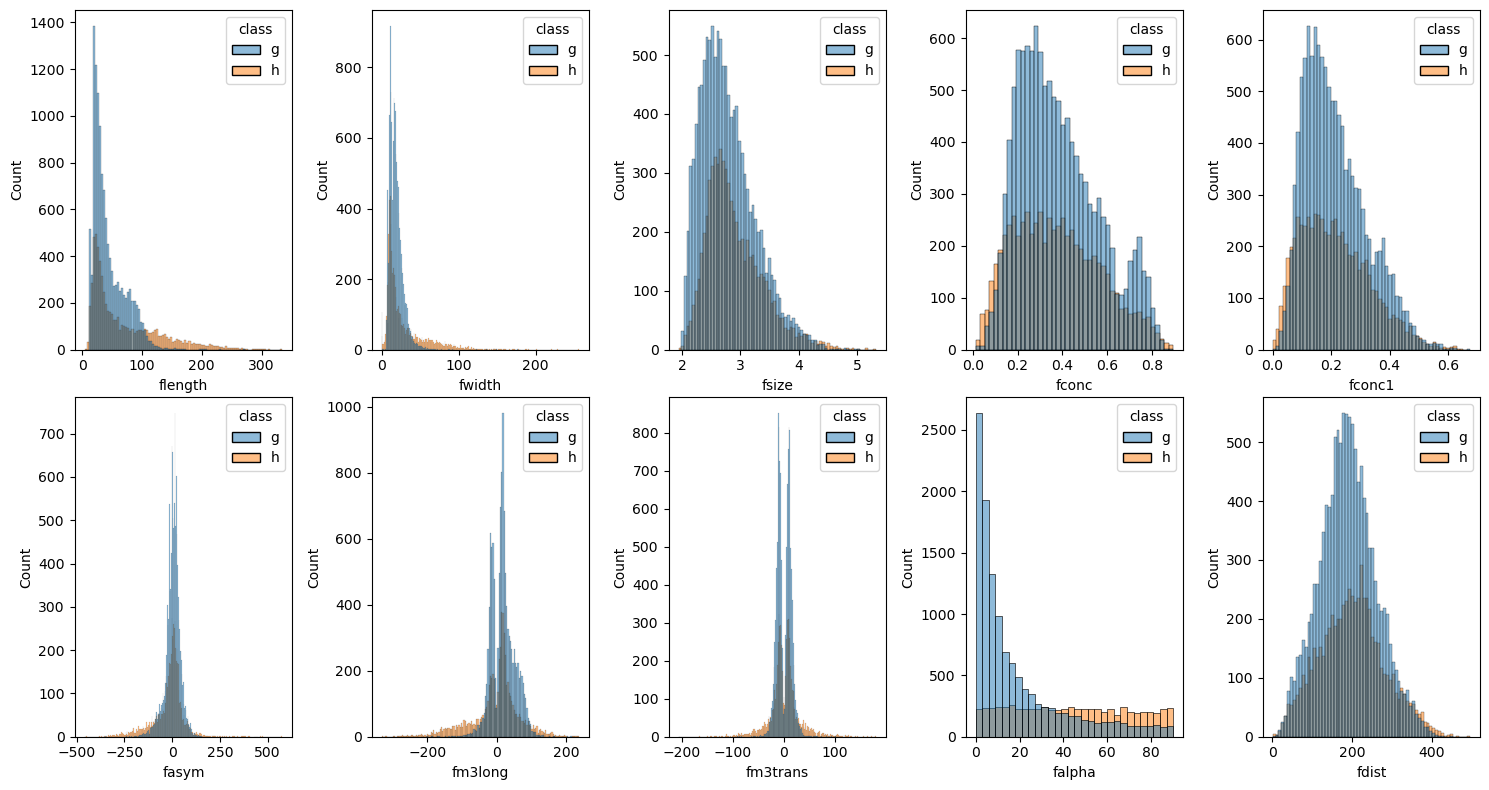

In [4]:
ncols=5
nrows=2
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,8))

a=0
for i in range(nrows):
  for j in range(ncols):
      sns.histplot(data=gamma, x=gamma.columns[a], ax=axs[i,j], hue='class')
      a+=1

plt.tight_layout(h_pad=0.3)

In [5]:
from sklearn.preprocessing import Normalizer, StandardScaler, FunctionTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from yellowbrick.target import ClassBalance

In [6]:
feat_transform = gamma.drop('class', axis=1)

columns = ['flength', 'fwidth', 'fsize', 'fconc', 'fconc1', 'fasym', 'fm3long', 'fm3trans', 'falpha', 'fdist',]
normalizer = QuantileTransformer(output_distribution='normal')
check_transform = normalizer.fit_transform(feat_transform)
check_transform =pd.DataFrame(check_transform, columns=[columns])
check_transform.head()

,flength,fwidth,fsize,fconc,fconc1,fasym,fm3long,fm3trans,falpha,fdist
0,-0.370200,-0.139710,-0.241963,0.167608,0.004391,0.798604,0.318582,-0.402405,0.539742,-1.504877
1,-0.218741,-0.708676,-0.570064,0.776520,1.286128,0.754747,0.383806,-0.572998,-0.590551,0.206340
2,1.837878,2.790319,2.091293,-2.840264,-2.806843,2.344221,-1.565883,-2.056080,1.475499,0.886726
3,-0.713541,-1.293078,-1.125776,1.165585,1.397701,0.780152,-0.478161,-0.312850,-0.309350,-1.027247
4,0.764305,1.001704,0.764374,-0.194936,-0.121995,-0.312546,0.526639,1.452989,-0.768314,2.047479


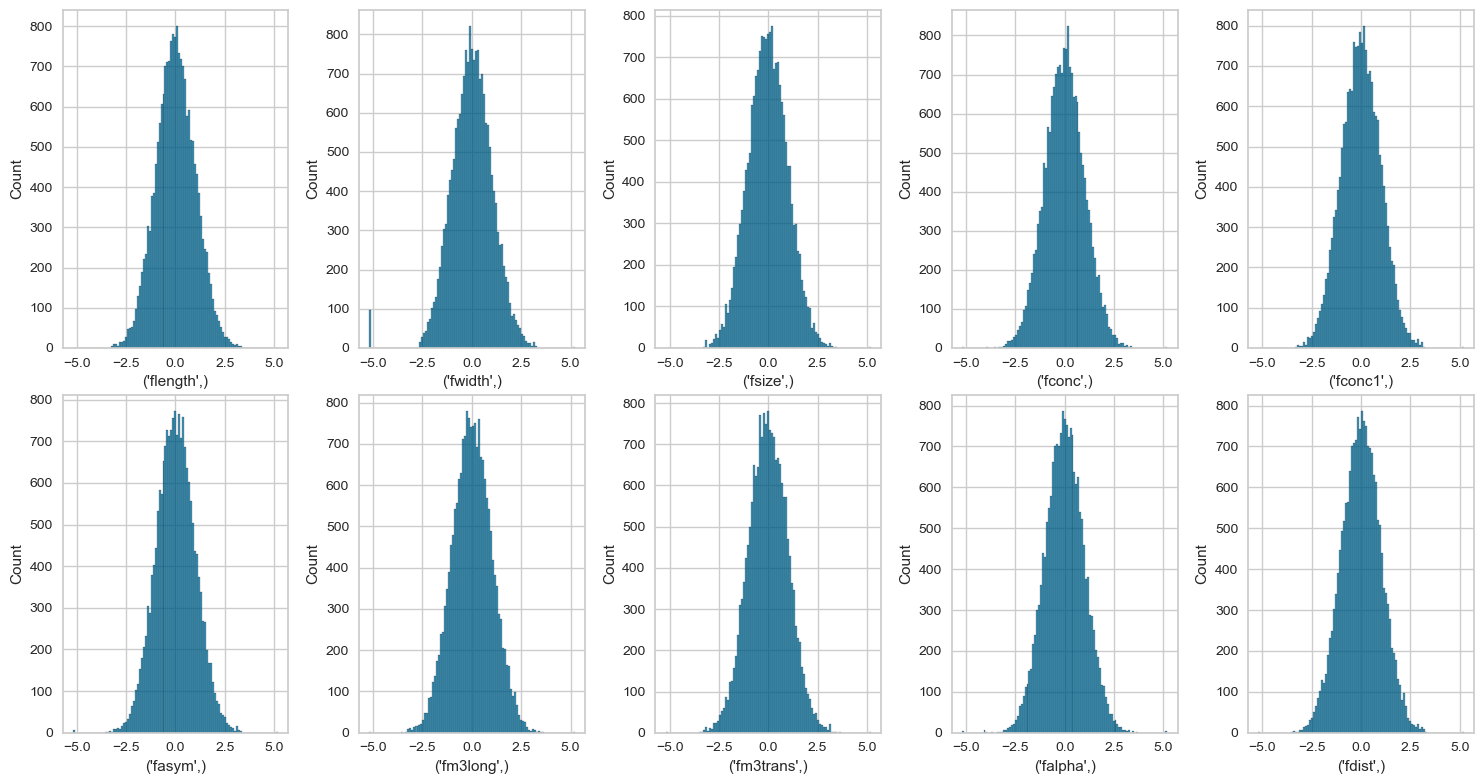

In [7]:
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,8))

a=0
for i in range(nrows):
  for j in range(ncols):
      sns.histplot(data=check_transform, x=check_transform.columns[a], ax=axs[i,j])
      a+=1

plt.tight_layout(h_pad=0.3)

/var/folders/__/58jr0ft96x74h5n7dl_4rp0h0000gn/T/ipykernel_3758/151841619.py:2: RuntimeWarning: divide by zero encountered in log
  return np.log(x+1)
/var/folders/__/58jr0ft96x74h5n7dl_4rp0h0000gn/T/ipykernel_3758/151841619.py:2: RuntimeWarning: invalid value encountered in log
  return np.log(x+1)


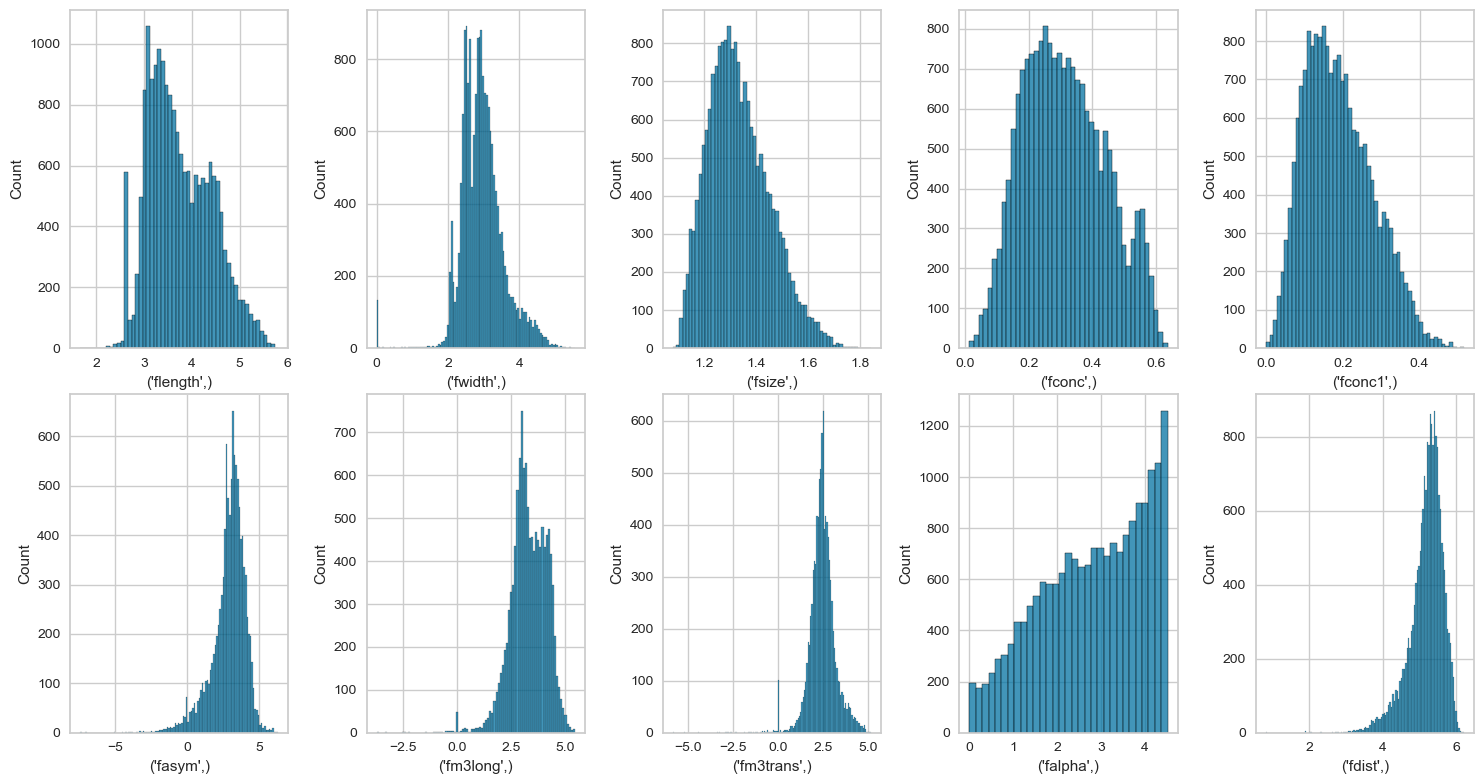

In [8]:
def log_func(x):
    return np.log(x+1)

def inv_log_fun(x):
    return np.exp(x-1)

log_transformer = FunctionTransformer(func=log_func, inverse_func=inv_log_fun, validate=True, check_inverse=False, feature_names_out='one-to-one')

check_2 = pd.DataFrame(log_transformer.fit_transform(feat_transform), columns=[columns])

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,8))

a=0
for i in range(nrows):
  for j in range(ncols):
      sns.histplot(data=check_2, x=check_2.columns[a], ax=axs[i,j])
      a+=1

plt.tight_layout(h_pad=0.3)

In [9]:
power_transf = ['fsize', 'fconc', 'fconc1', 'fdist']
log_variables = ['fwidth']
maxabs_variables = ['fasym']
quant_variables = ['falpha', 'flength', 'fm3trans', 'fm3long']

power_transformer = PowerTransformer()
log_transformer = FunctionTransformer(func=log_func, inverse_func=inv_log_fun, validate=True, check_inverse=False, feature_names_out='one-to-one')
maxabs_transformer = MaxAbsScaler()
quantile_transformer = QuantileTransformer(output_distribution='normal')

preprocessor = ColumnTransformer(transformers=[
  ('log', log_transformer, log_variables),
  ('power', power_transformer, power_transf),
  ('maxabs', maxabs_transformer, maxabs_variables),
  ('quant', quantile_transformer, quant_variables)
], remainder='passthrough', verbose_feature_names_out=False)

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('log',
                                 FunctionTransformer(check_inverse=False,
                                                     feature_names_out='one-to-one',
                                                     func=<function log_func at 0x1698c7910>,
                                                     inverse_func=<function inv_log_fun at 0x1698c7880>,
                                                     validate=True),
                                 ['fwidth']),
                                ('power', PowerTransformer(),
                                 ['fsize', 'fconc', 'fconc1', 'fdist']),
                                ('maxabs', MaxAbsScaler(), ['fasym']),
                                ('quant',
                                 QuantileTransformer(output_distribution='normal'),
                                 ['falpha', 'flength', 'fm3trans', 'fm3long'])],
                  verbose_feature_names_out=False)

In [10]:
double_check = pd.DataFrame(preprocessor.fit_transform(gamma), columns=preprocessor.get_feature_names_out())
double_check.head()

,fwidth,fsize,fconc,fconc1,fdist,fasym,falpha,flength,fm3trans,fm3long,class
0,2.833337,-0.256508,0.187668,-0.004515,-1.561182,0.048154,0.545191,-0.368442,-0.393433,0.294665,g
1,2.543451,-0.597211,0.880183,1.391486,0.195604,0.045672,-0.578711,-0.222137,-0.569965,0.364025,g
2,4.920207,2.032731,-2.372686,-2.352692,0.850179,0.202943,1.459723,1.816984,-2.050885,-1.556976,g
3,2.358285,-1.147733,1.24676,1.480958,-1.026627,0.047303,-0.290618,-0.715778,-0.296812,-0.481462,g
4,3.463248,0.838688,-0.244791,-0.155571,2.03975,-0.009609,-0.749392,0.74139,1.463506,0.505772,g


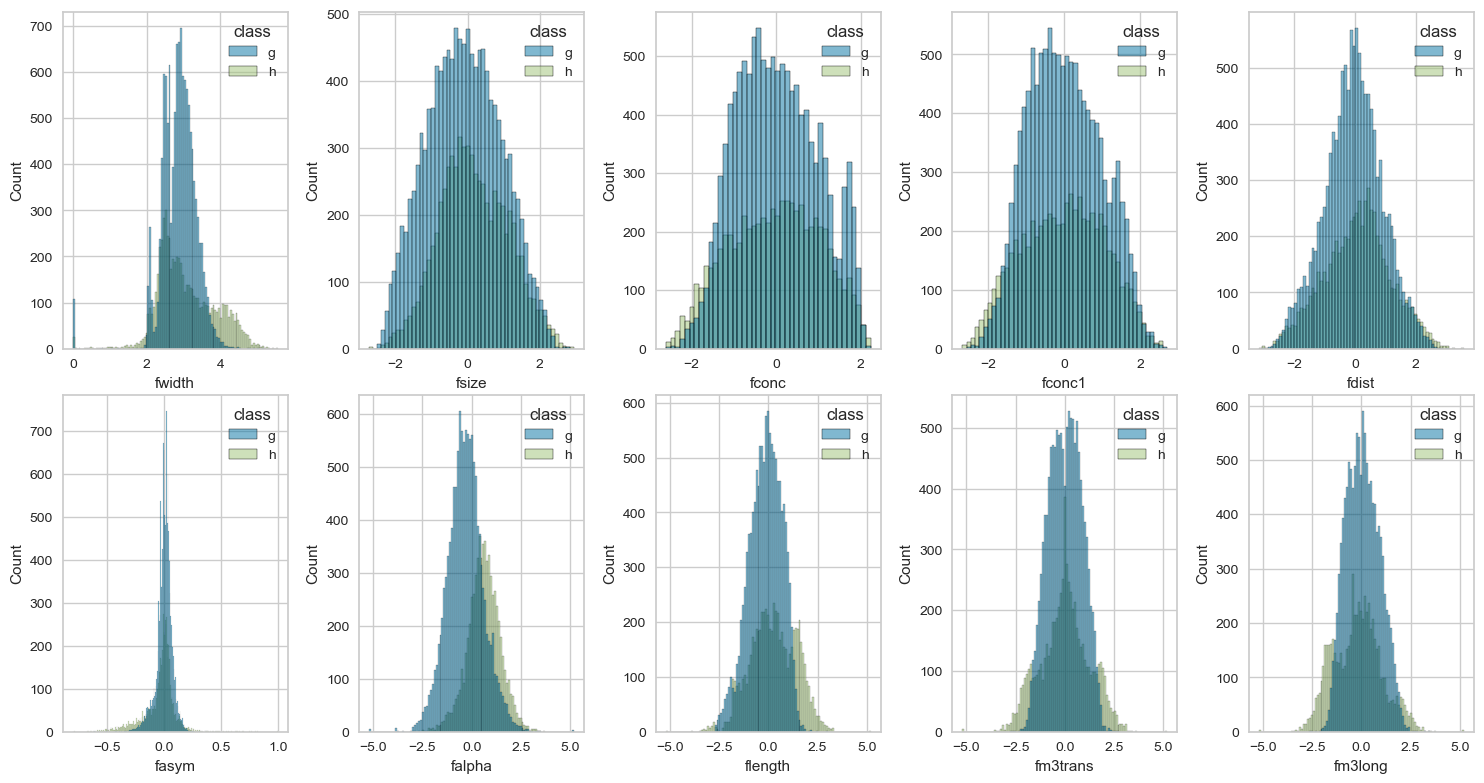

In [11]:
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,8))

a=0
for i in range(nrows):
  for j in range(ncols):
      sns.histplot(data=double_check, x=double_check.columns[a], ax=axs[i,j], hue=double_check.columns[10])
      a+=1

plt.tight_layout(h_pad=0.3)

### Model Creation

<AxesSubplot: xlabel='class', ylabel='count'>

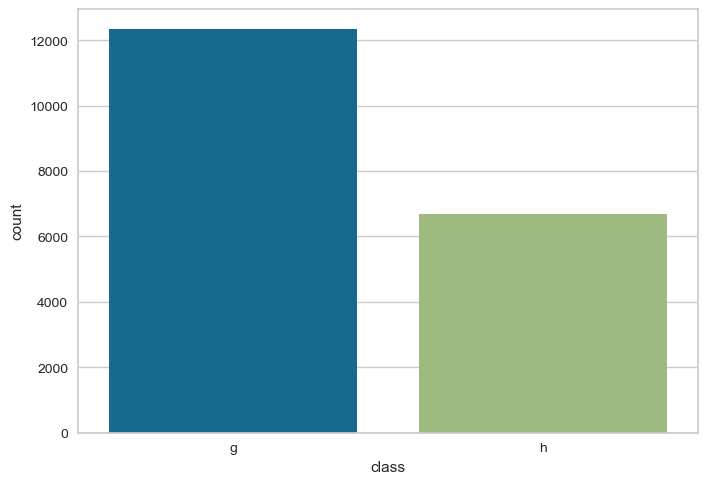

In [12]:
sns.countplot(data=gamma, x='class')

In [13]:
gamma['class'] = gamma['class'].map({'g':0, 'h':1})

<AxesSubplot: xlabel='class', ylabel='count'>

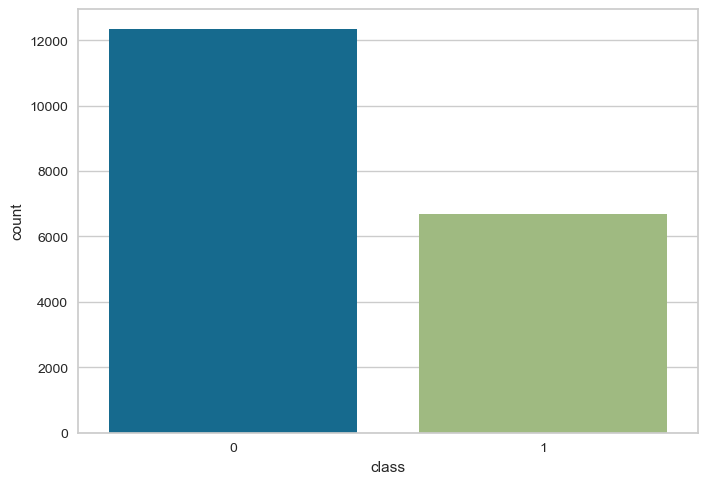

In [14]:
sns.countplot(data=gamma, x='class')

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV

train_set, test_set = train_test_split(gamma, train_size=0.9, stratify=gamma['class'])

print(train_set.shape)
print(test_set.shape)

(17118, 11)
(1902, 11)


Text(0.5, 1.0, 'Test set')

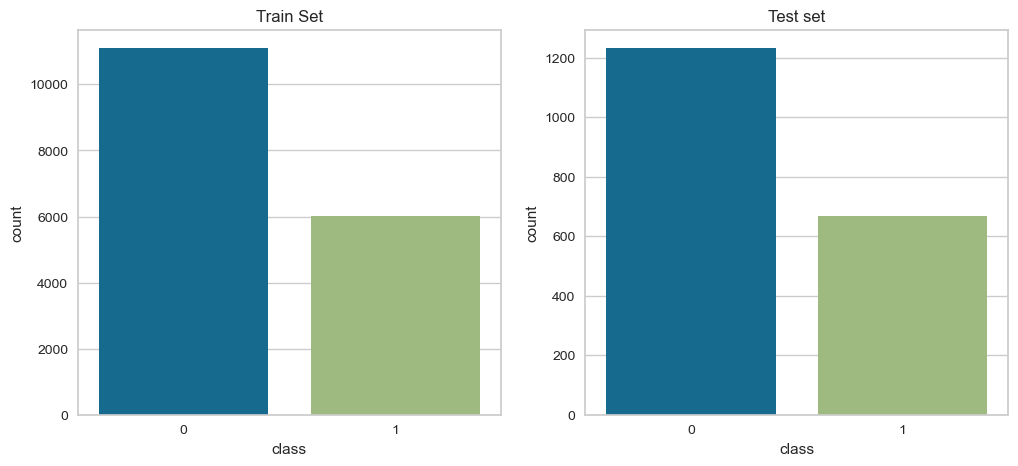

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.countplot(data=train_set, x='class', ax=axs[0])
sns.countplot(data=test_set, x='class', ax=axs[1])
axs[0].set_title('Train Set')
axs[1].set_title('Test set')

In [17]:
X = train_set.drop('class', axis=1)
y = train_set['class']
X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=15000)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print('+-+-+-+-+-+-+-+-+-+')
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(15000, 10)
(2118, 10)
(1902, 10)
+-+-+-+-+-+-+-+-+-+
(15000,)
(2118,)
(1902,)


In [18]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = Pipeline(steps=[('preprocessor', preprocessor), ('tree', DecisionTreeClassifier(max_depth=2, class_weight='balanced'))])
clf_dt

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  FunctionTransformer(check_inverse=False,
                                                                      feature_names_out='one-to-one',
                                                                      func=<function log_func at 0x1698c7910>,
                                                                      inverse_func=<function inv_log_fun at 0x1698c7880>,
                                                                      validate=True),
                                                  ['fwidth']),
                                                 ('power', PowerTransformer(),
                                                  ['fsize', 'fconc', 'fconc1',
                                                   'fdist']),
                                                 ('maxabs', MaxAbsScaler(),
                                                  ['fasym']),
                                                 ('quant',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  ['falpha', 'flength',
                                                   'fm3trans', 'fm3long'])],
                                   verbose_feature_names_out=False)),
                ('tree',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=2))])

In [19]:
clf_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  FunctionTransformer(check_inverse=False,
                                                                      feature_names_out='one-to-one',
                                                                      func=<function log_func at 0x1698c7910>,
                                                                      inverse_func=<function inv_log_fun at 0x1698c7880>,
                                                                      validate=True),
                                                  ['fwidth']),
                                                 ('power', PowerTransformer(),
                                                  ['fsize', 'fconc', 'fconc1',
                                                   'fdist']),
                                                 ('maxabs', MaxAbsScaler(),
                                                  ['fasym']),
                                                 ('quant',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  ['falpha', 'flength',
                                                   'fm3trans', 'fm3long'])],
                                   verbose_feature_names_out=False)),
                ('tree',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=2))])

In [20]:
from sklearn.metrics import roc_auc_score

y_pred_dt = clf_dt.predict(X_val)
print(f'ROC-AUC-Score in y_val {np.round(roc_auc_score(y_val, y_pred_dt),2)}')

ROC-AUC-Score in y_val 0.75


In [21]:
params_dt = {
  'tree__max_depth':[10, 20, 30],
  'tree__min_samples_split':[12, 14, 16],
  'tree__min_samples_leaf':[12, 14, 18],
  'tree__criterion':['gini', 'entropy', 'log_loss'],
  'tree__max_features':['sqrt', 'log2']
}
grid_clf_dt = GridSearchCV(
  clf_dt,
  param_grid=params_dt,
  scoring='roc_auc',
  cv=10,
  return_train_score=True,
  n_jobs=-1
)

grid_clf_dt.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('log',
                                                                         FunctionTransformer(check_inverse=False,
                                                                                             feature_names_out='one-to-one',
                                                                                             func=<function log_func at 0x1698c7910>,
                                                                                             inverse_func=<function inv_log_fun at 0x1698c7880>,
                                                                                             validate=True),
                                                                         ['fwidth']),
                                                                        ('power',
                                                                         PowerTransformer(),
                                                                         ['fsize',
                                                                          'fconc...
                                                          verbose_feature_names_out=False)),
                                       ('tree',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               max_depth=2))]),
             n_jobs=-1,
             param_grid={'tree__criterion': ['gini', 'entropy', 'log_loss'],
                         'tree__max_depth': [10, 20, 30],
                         'tree__max_features': ['sqrt', 'log2'],
                         'tree__min_samples_leaf': [12, 14, 18],
                         'tree__min_samples_split': [12, 14, 16]},
             return_train_score=True, scoring='roc_auc')

In [22]:
def fun_plot_grid_search_results(df):
    cm = sns.diverging_palette(5, 250, as_cmap=True)
    return (
        pd.concat([df['params'].apply(pd.Series), df[['mean_train_score', 'mean_test_score', 'rank_test_score']]], axis=1)
        .sort_values(by='rank_test_score').style.background_gradient(cmap=cm, subset=['mean_train_score', 'mean_test_score'])
    )

In [23]:
dt_best_params = pd.DataFrame(grid_clf_dt.cv_results_)
tabla_resultados = fun_plot_grid_search_results(dt_best_params)
tabla_resultados

,tree__criterion,tree__max_depth,tree__max_features,tree__min_samples_leaf,tree__min_samples_split,mean_train_score,mean_test_score,rank_test_score
66,entropy,10,log2,14,12,0.919974,0.884387,1
9,gini,10,log2,12,12,0.919971,0.884155,2
7,gini,10,sqrt,18,14,0.921766,0.882978,3
142,log_loss,20,log2,18,14,0.948750,0.882966,4
143,log_loss,20,log2,18,16,0.948945,0.882862,5
118,log_loss,10,log2,12,14,0.926227,0.882839,6
25,gini,20,sqrt,18,14,0.946622,0.882782,7
141,log_loss,20,log2,18,12,0.947559,0.882608,8
70,entropy,10,log2,18,14,0.921326,0.882381,9
65,entropy,10,log2,12,16,0.925418,0.882246,10


In [24]:
best_dt = grid_clf_dt.best_estimator_
best_dt

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  FunctionTransformer(check_inverse=False,
                                                                      feature_names_out='one-to-one',
                                                                      func=<function log_func at 0x1698c7910>,
                                                                      inverse_func=<function inv_log_fun at 0x1698c7880>,
                                                                      validate=True),
                                                  ['fwidth']),
                                                 ('power', PowerTransformer(),
                                                  ['fsize', 'fconc', 'fconc1',
                                                   'fdist']),
                                                 ('maxabs', MaxAbsScaler(),
                                                  ['fasym']),
                                                 ('quant',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  ['falpha', 'flength',
                                                   'fm3trans', 'fm3long'])],
                                   verbose_feature_names_out=False)),
                ('tree',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=10,
                                        max_features='log2',
                                        min_samples_leaf=14,
                                        min_samples_split=12))])

In [25]:
y_pred_dt = best_dt.predict(X_val)
y_pred_dt_probas = best_dt.predict_proba(X_val)[:,1]
print(f'ROC-AUC-Score in y_val {np.round(roc_auc_score(y_val, y_pred_dt),2)}')
print(f'ROC-AUC-Score in y_val {np.round(roc_auc_score(y_val, y_pred_dt_probas),2)}')

ROC-AUC-Score in y_val 0.83
ROC-AUC-Score in y_val 0.89


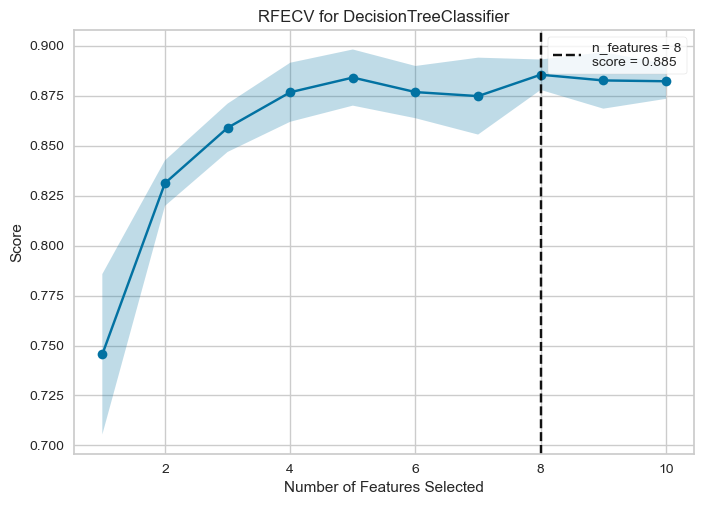

<AxesSubplot: title={'center': 'RFECV for DecisionTreeClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [26]:
from yellowbrick.model_selection import RFECV

vis_RFECV = RFECV(
  estimator=best_dt[-1],
  scoring='roc_auc',
  cv=10
)

vis_RFECV.fit(X_train, y_train)
vis_RFECV.show()

In [27]:
for i in range(X_train.shape[-1]):
  print('Column name: %s | Selected %s | Rank %0.2f' % (X_train.columns[i], vis_RFECV.support_[i], vis_RFECV.ranking_[i]))

Column name: flength | Selected True | Rank 1.00
Column name: fwidth | Selected True | Rank 1.00
Column name: fsize | Selected True | Rank 1.00
Column name: fconc | Selected True | Rank 1.00
Column name: fconc1 | Selected True | Rank 1.00
Column name: fasym | Selected False | Rank 2.00
Column name: fm3long | Selected True | Rank 1.00
Column name: fm3trans | Selected False | Rank 3.00
Column name: falpha | Selected True | Rank 1.00
Column name: fdist | Selected True | Rank 1.00


In [28]:
X_train_dt = X_train.drop(['fm3trans', 'fm3long', 'fasym'], axis=1)
X_val_dt = X_val.drop(['fm3trans', 'fm3long', 'fasym'], axis=1)

In [29]:
power_transf_dt = ['fsize', 'fconc', 'fconc1', 'fdist']
log_variables_dt = ['fwidth']
#maxabs_variables_dt = ['fasym']
quant_variables_dt = ['falpha', 'flength']

power_transformer_dt = PowerTransformer()
log_transformer_dt = FunctionTransformer(func=log_func, inverse_func=inv_log_fun, validate=True, check_inverse=False, feature_names_out='one-to-one')
#maxabs_transformer_dt = MaxAbsScaler()
quantile_transformer_dt = QuantileTransformer(output_distribution='normal')

preprocessor_dt = ColumnTransformer(transformers=[
  ('log', log_transformer_dt, log_variables_dt),
  ('power', power_transformer_dt, power_transf_dt),
  #('maxabs', maxabs_transformer_dt, maxabs_variables_dt),
  ('quant', quantile_transformer_dt, quant_variables_dt)
], remainder='passthrough', verbose_feature_names_out=False)

dt_rfecv = Pipeline(steps=[
  ('preprocessor', preprocessor_dt),
  ('tree', DecisionTreeClassifier(
    class_weight='balanced', 
    criterion='log_loss', 
    max_depth=10, 
    max_features='log2', 
    min_samples_leaf=14, 
    min_samples_split=12))
])

dt_rfecv

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  FunctionTransformer(check_inverse=False,
                                                                      feature_names_out='one-to-one',
                                                                      func=<function log_func at 0x1698c7910>,
                                                                      inverse_func=<function inv_log_fun at 0x1698c7880>,
                                                                      validate=True),
                                                  ['fwidth']),
                                                 ('power', PowerTransformer(),
                                                  ['fsize', 'fconc', 'fconc1',
                                                   'fdist']),
                                                 ('quant',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  ['falpha', 'flength'])],
                                   verbose_feature_names_out=False)),
                ('tree',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='log_loss', max_depth=10,
                                        max_features='log2',
                                        min_samples_leaf=14,
                                        min_samples_split=12))])

In [30]:
dt_rfecv.fit(X_train_dt, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  FunctionTransformer(check_inverse=False,
                                                                      feature_names_out='one-to-one',
                                                                      func=<function log_func at 0x1698c7910>,
                                                                      inverse_func=<function inv_log_fun at 0x1698c7880>,
                                                                      validate=True),
                                                  ['fwidth']),
                                                 ('power', PowerTransformer(),
                                                  ['fsize', 'fconc', 'fconc1',
                                                   'fdist']),
                                                 ('quant',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  ['falpha', 'flength'])],
                                   verbose_feature_names_out=False)),
                ('tree',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='log_loss', max_depth=10,
                                        max_features='log2',
                                        min_samples_leaf=14,
                                        min_samples_split=12))])

In [31]:
y_pred_dt = dt_rfecv.predict(X_val_dt)
y_pred_dt_probas = dt_rfecv.predict_proba(X_val_dt)[:,1]
print(f'ROC-AUC-Score in y_val {np.round(roc_auc_score(y_val, y_pred_dt),2)}')
print(f'ROC-AUC-Score in y_val {np.round(roc_auc_score(y_val, y_pred_dt_probas),2)}')

ROC-AUC-Score in y_val 0.83
ROC-AUC-Score in y_val 0.9


In [32]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('rf', RandomForestClassifier(
    class_weight='balanced', 
    criterion='log_loss', 
    max_depth=30, 
    max_features='log2', 
    min_samples_leaf=12, 
    min_samples_split=12, 
    n_estimators=500))
])

clf_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  FunctionTransformer(check_inverse=False,
                                                                      feature_names_out='one-to-one',
                                                                      func=<function log_func at 0x1698c7910>,
                                                                      inverse_func=<function inv_log_fun at 0x1698c7880>,
                                                                      validate=True),
                                                  ['fwidth']),
                                                 ('power', PowerTransformer(),
                                                  ['fsize', 'fconc', 'fconc1',
                                                   'fdist']),
                                                 ('maxabs', MaxAbsScaler(),
                                                  ['fasym']),
                                                 ('quant',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  ['falpha', 'flength',
                                                   'fm3trans', 'fm3long'])],
                                   verbose_feature_names_out=False)),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='log_loss', max_depth=30,
                                        max_features='log2',
                                        min_samples_leaf=12,
                                        min_samples_split=12,
                                        n_estimators=500))])

In [33]:
clf_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  FunctionTransformer(check_inverse=False,
                                                                      feature_names_out='one-to-one',
                                                                      func=<function log_func at 0x1698c7910>,
                                                                      inverse_func=<function inv_log_fun at 0x1698c7880>,
                                                                      validate=True),
                                                  ['fwidth']),
                                                 ('power', PowerTransformer(),
                                                  ['fsize', 'fconc', 'fconc1',
                                                   'fdist']),
                                                 ('maxabs', MaxAbsScaler(),
                                                  ['fasym']),
                                                 ('quant',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  ['falpha', 'flength',
                                                   'fm3trans', 'fm3long'])],
                                   verbose_feature_names_out=False)),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='log_loss', max_depth=30,
                                        max_features='log2',
                                        min_samples_leaf=12,
                                        min_samples_split=12,
                                        n_estimators=500))])

In [34]:
y_pred_rf = clf_rf.predict(X_val)
y_pred_rf_proba = dt_rfecv.predict_proba(X_val)[:,1]
print(f'ROC-AUC-Score in y_val {np.round(roc_auc_score(y_val, y_pred_rf),2)}')
print(f'ROC-AUC-Score in y_val {np.round(roc_auc_score(y_val, y_pred_rf_proba),2)}')

ROC-AUC-Score in y_val 0.86
ROC-AUC-Score in y_val 0.9


In [35]:
X_small, other = train_test_split(gamma, train_size=1500, stratify=gamma['class'])

X_small_check = X_small.drop('class', axis=1)
y_small_check = X_small['class']

print(X_small_check.shape)
print(y_small_check.shape)

(1500, 10)
(1500,)


In [36]:
params_rf = {
  'rf__n_estimators':[100, 300, 500],
  'rf__max_depth':[10, 20, 30],
  'rf__min_samples_split':[12, 14, 16],
  'rf__min_samples_leaf':[12, 14, 18],
  'rf__criterion':['gini', 'entropy', 'log_loss'],
  'rf__max_features':['sqrt', 'log2']
}

grid_clf_rf = GridSearchCV(
  clf_rf,
  param_grid=params_rf,
  scoring='roc_auc',
  cv=10,
  return_train_score=True,
  n_jobs=-1
)

grid_clf_rf.fit(X_small_check, y_small_check)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('log',
                                                                         FunctionTransformer(check_inverse=False,
                                                                                             feature_names_out='one-to-one',
                                                                                             func=<function log_func at 0x1698c7910>,
                                                                                             inverse_func=<function inv_log_fun at 0x1698c7880>,
                                                                                             validate=True),
                                                                         ['fwidth']),
                                                                        ('power',
                                                                         PowerTransformer(),
                                                                         ['fsize',
                                                                          'fconc...
                                                               max_features='log2',
                                                               min_samples_leaf=12,
                                                               min_samples_split=12,
                                                               n_estimators=500))]),
             n_jobs=-1,
             param_grid={'rf__criterion': ['gini', 'entropy', 'log_loss'],
                         'rf__max_depth': [10, 20, 30],
                         'rf__max_features': ['sqrt', 'log2'],
                         'rf__min_samples_leaf': [12, 14, 18],
                         'rf__min_samples_split': [12, 14, 16],
                         'rf__n_estimators': [100, 300, 500]},
             return_train_score=True, scoring='roc_auc')

In [37]:
rf_best_params = pd.DataFrame(grid_clf_rf.cv_results_)
rf_resultados = fun_plot_grid_search_results(rf_best_params)
rf_resultados

,rf__criterion,rf__max_depth,rf__max_features,rf__min_samples_leaf,rf__min_samples_split,rf__n_estimators,mean_train_score,mean_test_score,rank_test_score
304,entropy,30,log2,12,16,300,0.971846,0.914983,1
385,log_loss,20,sqrt,12,16,300,0.971969,0.914685,2
462,log_loss,30,log2,12,14,100,0.971885,0.914653,3
219,entropy,20,sqrt,12,14,100,0.971402,0.914457,4
165,entropy,10,sqrt,12,14,100,0.969305,0.914187,5
467,log_loss,30,log2,12,16,500,0.971959,0.914146,6
461,log_loss,30,log2,12,12,500,0.971985,0.913833,7
297,entropy,30,log2,12,12,100,0.971200,0.913830,8
170,entropy,10,sqrt,12,16,500,0.970194,0.913793,9
195,entropy,10,log2,12,16,100,0.969829,0.913755,10


In [38]:
best_rf = grid_clf_rf.best_estimator_
best_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  FunctionTransformer(check_inverse=False,
                                                                      feature_names_out='one-to-one',
                                                                      func=<function log_func at 0x1698c7910>,
                                                                      inverse_func=<function inv_log_fun at 0x1698c7880>,
                                                                      validate=True),
                                                  ['fwidth']),
                                                 ('power', PowerTransformer(),
                                                  ['fsize', 'fconc', 'fconc1',
                                                   'fdist']),
                                                 ('maxabs', MaxAbsScaler(),
                                                  ['fasym']),
                                                 ('quant',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  ['falpha', 'flength',
                                                   'fm3trans', 'fm3long'])],
                                   verbose_feature_names_out=False)),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=30,
                                        max_features='log2',
                                        min_samples_leaf=12,
                                        min_samples_split=16,
                                        n_estimators=300))])

In [39]:
best_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  FunctionTransformer(check_inverse=False,
                                                                      feature_names_out='one-to-one',
                                                                      func=<function log_func at 0x1698c7910>,
                                                                      inverse_func=<function inv_log_fun at 0x1698c7880>,
                                                                      validate=True),
                                                  ['fwidth']),
                                                 ('power', PowerTransformer(),
                                                  ['fsize', 'fconc', 'fconc1',
                                                   'fdist']),
                                                 ('maxabs', MaxAbsScaler(),
                                                  ['fasym']),
                                                 ('quant',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  ['falpha', 'flength',
                                                   'fm3trans', 'fm3long'])],
                                   verbose_feature_names_out=False)),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=30,
                                        max_features='log2',
                                        min_samples_leaf=12,
                                        min_samples_split=16,
                                        n_estimators=300))])

In [40]:
y_pred_rf = best_rf.predict(X_val)
y_pred_rf_proba = best_rf.predict_proba(X_val)[:,1]
print(f'ROC-AUC-Score in y_val {np.round(roc_auc_score(y_val, y_pred_rf),2)}')
print(f'ROC-AUC-Score in y_val {np.round(roc_auc_score(y_val, y_pred_rf_proba),2)}')

ROC-AUC-Score in y_val 0.85
ROC-AUC-Score in y_val 0.94


/Users/alejandrodelgado/kaggle/kaggle_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 8 ) missing from current font.



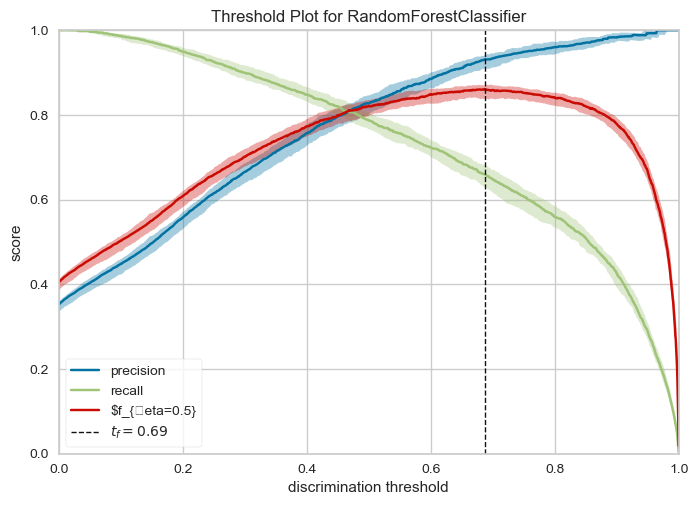

<AxesSubplot: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [51]:
from yellowbrick.classifier.threshold import DiscriminationThreshold

vis_threshold = DiscriminationThreshold(
    best_rf,
    exclude='queue_rate',
    fbeta=0.5
    
)

vis_threshold.fit(X_train, y_train)
vis_threshold.show()

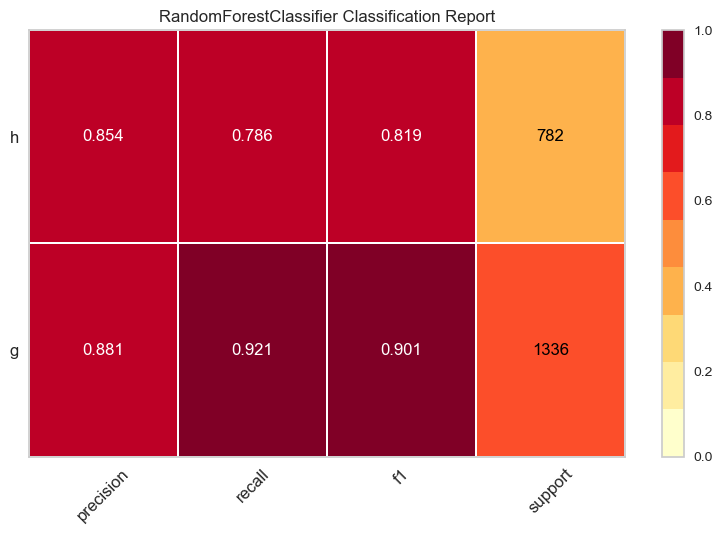

<AxesSubplot: title={'center': 'RandomForestClassifier Classification Report'}>

In [42]:
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix

vis_report = ClassificationReport(best_rf, classes=['g','h'], support=True)
vis_report.fit(X_train, y_train)
vis_report.score(X_val, y_val)
vis_report.show()

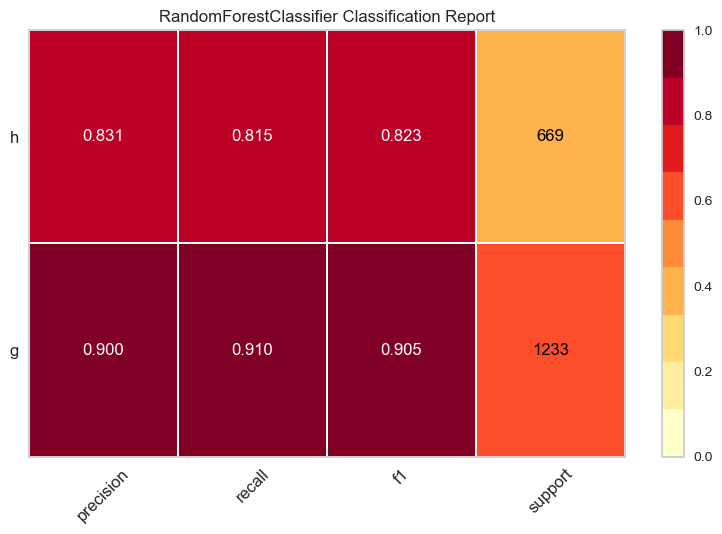

<AxesSubplot: title={'center': 'RandomForestClassifier Classification Report'}>

In [43]:
vis_report = ClassificationReport(best_rf, classes=['g','h'], support=True)
vis_report.fit(X_train, y_train)
vis_report.score(X_test, y_test)
vis_report.show()

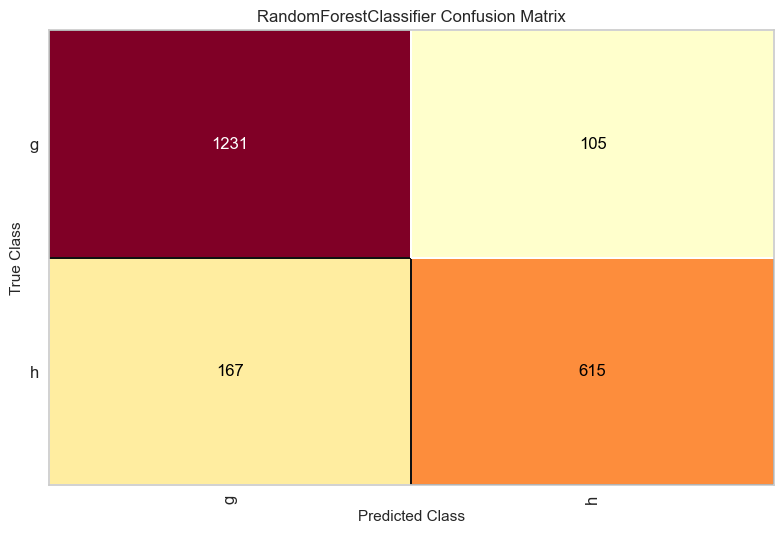

<AxesSubplot: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [44]:
vis_matrix = ConfusionMatrix(best_rf, classes=['g','h'])

vis_matrix.fit(X_train, y_train)
vis_matrix.score(X_val, y_val)
vis_matrix.show()

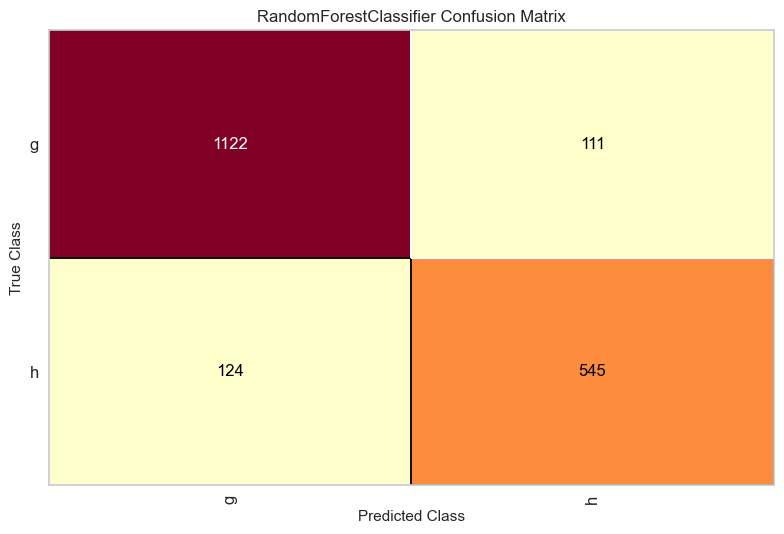

<AxesSubplot: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [45]:
vis_matrix = ConfusionMatrix(best_rf, classes=['g','h'])

vis_matrix.fit(X_train, y_train)
vis_matrix.score(X_test, y_test)
vis_matrix.show()

In [46]:
def fun_predict_with_threshold(model, X_test, threshold):
  threshold = threshold
  return np.round(np.where(model.predict_proba(X_test)[:,1] < threshold, 0, 1),2)

def fun_predict(model, X_test):
  return model.predict(X_test)

In [52]:
y_test_probas = fun_predict_with_threshold(best_rf, X_test, 0.69)
y_test_pred = fun_predict(best_rf, X_test)

test_set['probas'] = y_test_probas
test_set['preds'] = y_test_pred

test_set.head()

,flength,fwidth,fsize,fconc,fconc1,fasym,fm3long,fm3trans,falpha,fdist,class,probas,preds,prob_value
10040,41.9869,14.8955,2.6154,0.3491,0.2218,32.7394,38.5268,-12.0441,18.8358,142.1960,g,0,0,0.165642
5189,36.2882,17.8381,2.9178,0.3130,0.1746,14.8849,28.7377,-13.8824,0.1809,211.3780,g,0,0,0.054468
11637,27.0596,15.8193,2.4669,0.4812,0.2884,16.0704,13.3710,13.2184,37.9920,114.8490,g,0,0,0.306594
7230,84.7453,26.8882,3.6902,0.1567,0.0972,-87.0432,71.3852,-16.1436,5.3995,243.5070,g,0,0,0.037738
18734,40.9114,11.8167,2.6528,0.4892,0.3062,7.0176,35.4742,5.3901,9.9994,117.8781,h,0,0,0.440647


In [53]:
test_set['probas'] = test_set['probas'].map({0:'g', 1:'h'})
test_set['preds'] = test_set['preds'].map({0:'g', 1:'h'})
#test_set['class'] = test_set['class'].map({0:'g', 1:'h'})

In [54]:
test_set['prob_value'] = best_rf.predict_proba(X_test)[:,1]
test_set.head()

,flength,fwidth,fsize,fconc,fconc1,fasym,fm3long,fm3trans,falpha,fdist,class,probas,preds,prob_value
10040,41.9869,14.8955,2.6154,0.3491,0.2218,32.7394,38.5268,-12.0441,18.8358,142.1960,g,g,g,0.165642
5189,36.2882,17.8381,2.9178,0.3130,0.1746,14.8849,28.7377,-13.8824,0.1809,211.3780,g,g,g,0.054468
11637,27.0596,15.8193,2.4669,0.4812,0.2884,16.0704,13.3710,13.2184,37.9920,114.8490,g,g,g,0.306594
7230,84.7453,26.8882,3.6902,0.1567,0.0972,-87.0432,71.3852,-16.1436,5.3995,243.5070,g,g,g,0.037738
18734,40.9114,11.8167,2.6528,0.4892,0.3062,7.0176,35.4742,5.3901,9.9994,117.8781,h,g,g,0.440647


In [56]:
plt.figure(figsize=(15,7))
fig = px.parallel_categories(test_set, dimensions=['class', 'probas', 'preds'])
fig.show()

<Figure size 1500x700 with 0 Axes>